<a href="https://colab.research.google.com/github/priyanshudey11/Data-Science-Project-2-2023/blob/main/DS220_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 220 – Project #2 on Data Analysis with Python – Individual or Team!
##Project #2 – **Data Analysis with Python** – An Individual or Team (max 6) Project which you
must each host on your individual Github Account
## **Group members:** Yu-Hsiang Huang, Rowan Tolfree, Priyanshu Dey, Nathan Mannings, Cael Walter



In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#make sure that the dataset is imported to the notebook
nobel = pd.read_csv('export.csv')
pd.set_option('display.max_columns', 10)
nobel

,id,firstname,surname,born,died,...,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,...,1,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,...,2,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,...,2,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Henri,Becquerel,1852-12-15,1908-08-25,...,2,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,...,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...
995,1030,Louis,Brus,1943-00-00,0000-00-00,...,3,"""for the discovery and synthesis of quantum dots""",Columbia University,New York NY,USA
996,1031,Aleksey,Yekimov,1945-00-00,0000-00-00,...,3,"""for the discovery and synthesis of quantum dots""",Nanocrystals Technology Inc.,New York NY,USA
997,1032,Jon,Fosse,1959-09-29,0000-00-00,...,1,"""for his innovative plays and prose which give...",NaN,NaN,NaN
998,1033,Narges,Mohammadi,1972-04-21,0000-00-00,...,1,"""for her fight against the oppression of women...",NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

***Question #1:*** What are the Top 5 institutions with the most Nobel laureates and their top category?

In [ ]:
# Question 1: Distribution of Nobel laureates by University and find each of the top 5 university's top category

laureates_university = nobel['name'].value_counts().reset_index()
laureates_university.columns = ['University', 'Laureates Count']
laureates_university.head()

most_common_category = nobel.groupby('name')['category'].agg(lambda x: x.value_counts().idxmax())

# Join the most common category with the laureates_university DataFrame
laureates_university = laureates_university.join(most_common_category, on='University')
laureates_university.columns = ['university', 'Laureates Count', 'Top Category']

# Display the top 5 universities with their most represented category
laureates_university.head()

,university,Laureates Count,Top Category
0,University of California,36,chemistry
1,Harvard University,28,physics
2,Stanford University,22,physics
3,Massachusetts Institute of Technology (MIT),22,economics
4,University of Chicago,19,economics


***Question #2:*** What are the trends of the gender of Nobel laureates throughout the year?

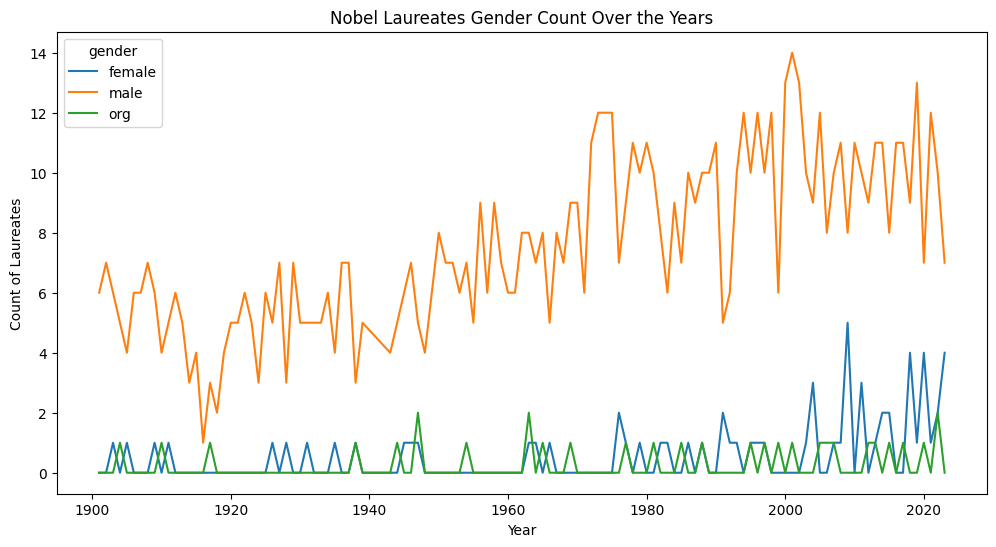

In [ ]:
%matplotlib inline
# Convert 'year' column to numeric for plotting
nobel['year'] = pd.to_numeric(nobel['year'], errors='coerce')

# Grouping by year and gender and counting the number of laureates
gender_count_by_year = nobel.groupby(['year', 'gender']).size().unstack(fill_value=0)

# Plotting the data
gender_count_by_year.plot(kind='line', figsize=(12, 6), title='Nobel Laureates Gender Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Laureates')
plt.show()

***Question #3:*** What were the top 5 countries that produced the most Nobel Prize winning Laurets and what was the top type?





In [ ]:
# Group the DataFrame by 'bornCountry' and count the number of laureates for each country
laureates_by_country = nobel.groupby(['bornCountry'])['id'].count().reset_index()

#group and find the most top category per country
category_by_country = nobel.groupby(['bornCountry'])['category'].max().reset_index()

#combine the two querries
combined = pd.merge(laureates_by_country, category_by_country, on='bornCountry', how='outer')

# Find the top 5 countries with the most laureates
top_countries = combined.nlargest(5, 'id')

#set the new column titles
top_countries.columns=['Country of birth','Prize Count','Category']

#print Graph
top_countries.head()


,Country of birth,Prize Count,Category
116,USA,292,physics
120,United Kingdom,90,physics
46,Germany,67,physics
41,France,58,physics
109,Sweden,30,physics


Question #4: At what age did the winners of the Nobel Prize receive their reward?

<ipython-input-14-d3285bfa1ef8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['born'] = pd.to_datetime(age_data['born'], errors='coerce')
<ipython-input-14-d3285bfa1ef8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['age_at_award'] = age_data['year'] - age_data['born'].dt.year


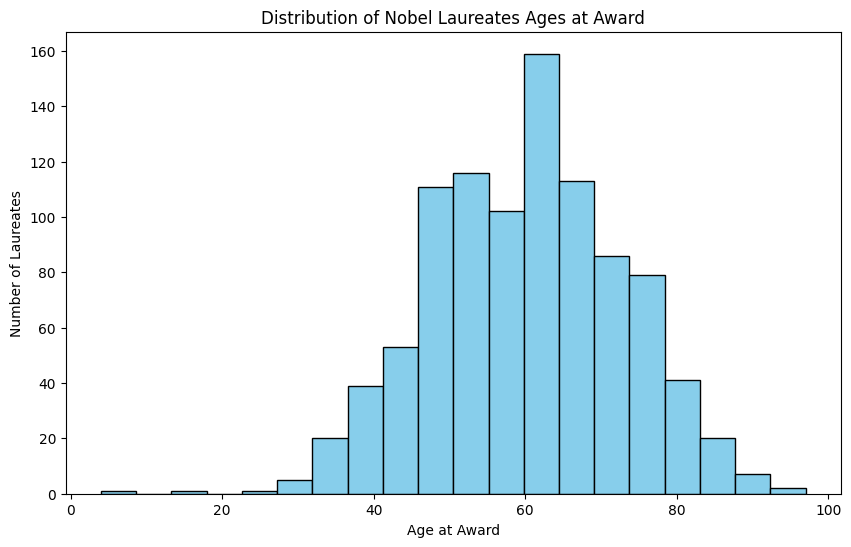

In [ ]:
# Extract relevant columns
age_data = nobel[['born', 'year']]

# Convert birth_date to datetime
age_data['born'] = pd.to_datetime(age_data['born'], errors='coerce')

# Calculate age at the time of receiving the award
age_data['age_at_award'] = age_data['year'] - age_data['born'].dt.year

# Filter out invalid age values, if any
valid_age_data = age_data[age_data['age_at_award'] >= 0]

# Plotting the distribution of ages
plt.figure(figsize=(10, 6))
plt.hist(valid_age_data['age_at_award'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Nobel Laureates Ages at Award')
plt.xlabel('Age at Award')
plt.ylabel('Number of Laureates')
plt.show()

**Question #5: How long has this dataset been maintained for?**



In [ ]:
# Extract the prize year column
prize_years = nobel['year']

# Find the start and end years of the dataset
start_year = prize_years.min()
end_year = prize_years.max()

print(f"The Nobel Prize dataset has been maintained from {start_year} to {end_year}.")

The Nobel Prize dataset has been maintained from 1901 to 2023.


#Question #6: What is the top 5 Categories with the highest shared noble Prizes
*Priyanshu*




**Overview:**
>This section outlines the methodology used to determine which Nobel Prize categories have the most shared prizes. It explains the process of filtering and grouping the dataset to count shared prizes in each category

**Methodology:**
>For this analysis, our objective was to identify the Nobel Prize categories with the highest number of shared prizes. This can give insights into which fields tend to have collaborative work leadijng to Nobel-worthy discoveries. We filtered the dataset for prizes shared by laureates and then grouped these by category to count the occurrences.




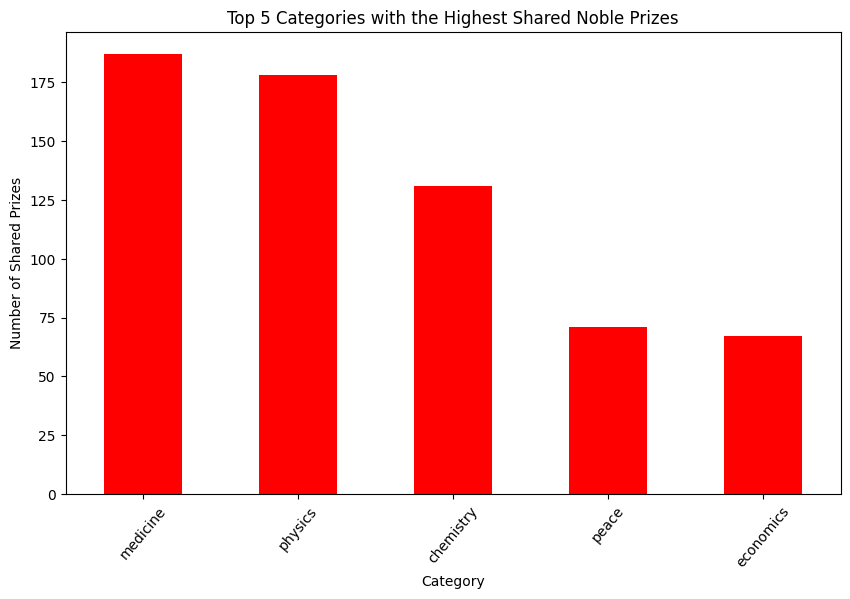

In [12]:
'''
This code snippet performs an analyiss on the Nobel Prize dataset to find which categories
of the Nobel Prize have the highest number of shared prizes.
'''
#Filter for shared prizes
shared_prizes= nobel[nobel['share']>1]
#Group by catergory and count the shared prizes
shared_prizes_count= shared_prizes.groupby('category').size()
#Get top 5 categories with the most shared prizes
top_shared_prizes_categories= shared_prizes_count.nlargest(5)
#Print the top 5 as a graph
plt.figure(figsize=(10,6))
#choosing the color of the bars
top_shared_prizes_categories.plot(kind='bar', color='red')
#Labels for the graph
plt.title('Top 5 Categories with the Highest Shared Noble Prizes')
plt.xlabel('Category')
plt.ylabel('Number of Shared Prizes')
#adjusting the layout and setting the axis lables to 50 degres s for better viewing
plt.xticks(rotation=50)
plt.show()

**Findings:**
> Upon analyzing the data, we discovered that the top 5 categories in terms of shared Nobel Prizes are Medicine, Physics, Chemistry, Peace, and Economics. These results suggest that these significant scientific fields, often involve collaborative research. The high number of shared prizes in these categories could indicate the complexity and scale of work in these areas, often requiring teamwork and joint efforts.




#Question #7 Which field has seen the most growth in terms of laureates over the years
*Priyanshu*





**Overview:**
>Describes the methodology for exammining the growth trends of Nobel Prize categories over time. This includes calculating cummalative laureate counts and anazlyzing recent trends.

**Methodology:**
>We aimed to understand how the representation of different Nobel Prize categories has evolved over the years. This involved calculation the cumulative count of laureates in each category over time and analyzing the distribution of Nobel Prizes in the most recent decade.



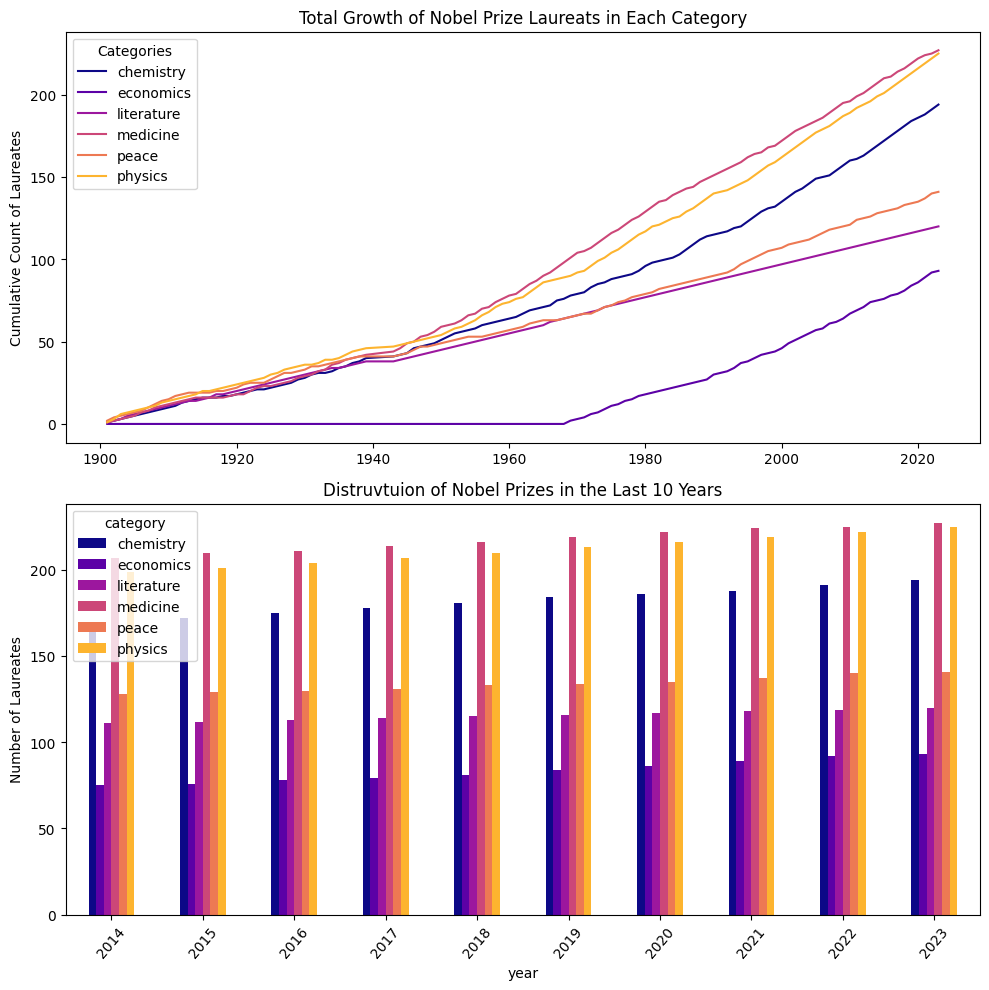

In [13]:
'''
This code snippet is designed to visualize the growth and distribution of Nobel Prize
laureates across differnt categories over time
'''
#Group the Nobel dataset by year and category then count num of laureates in each category per year
categiry_growth= nobel.groupby(['year','category']).size().unstack(fill_value=0)
#Calculating the cumulative sum of laureates in each category over the years
total_category_growth= categiry_growth.cumsum()
#Extracting the last 10 years of data to analyze recent trends
recent_shift=total_category_growth.tail(10)
#Choosing a color map for the plot
Colormap=plt.cm.plasma
num_categories = len(total_category_growth.columns)
#Generating a list of colors from the colorpam, one for each category
colors=[Colormap(i/num_categories)for i in range(num_categories)]

#Seting up figures for two sublplots
plt.figure(figsize=(10,10))

#First Subplot: Cumlative growth of laureates in each category
plt.subplot(2,1,1)
#Creates correspoding colors for the differnt category
for category, color in zip(total_category_growth.columns,colors):
  plt.plot(total_category_growth.index,total_category_growth[category],label=category,color=color)
plt.legend(title="Categories")
plt.title('Total Growth of Nobel Prize Laureats in Each Category')
plt.ylabel('Cumulative Count of Laureates')

#Secound subplot:Distribution of Nobel Prizes in the last 30 years
plt.subplot(2,1,2)
#Calculating the number of categories for color mapping
num_categories=len(recent_shift.columns)
#Plotting the recent shift in Nobel Prizes with different colors for each
recent_shift.plot(kind='bar', ax=plt.gca(), stacked= False,color=colors)
#Ploting the Labels for each
plt.title ('Distruvtuion of Nobel Prizes in the Last 10 Years')
plt.ylabel('Number of Laureates')

#adjusting the layout and setting the axis lables to 50 degres s for better viewing
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

**Findings**
>The cumulative analysis over the years showed a steady increase in all categories with a notable acceleration in certain fields like Physics and Medicine. The recent decade analysis highlighted an interesting shift with categories like Economics and Peace becoming more prominent. This means the growth trends in categories like physics and medicine align with the rapid advancements and increasing complexities in there fields. The recent rise in categories like economics and peace could reflect the evolving global focus on economic theories and peacekeeping efforts in response to contemporary challenges.